# Blood Donor Identification

This project will teach you

* how to analyze and clean data
* how to identify predictive features and test hypothesis
* fundamental classification metrics
* training cycle of an ML model
* fine-tuning Logistic Regression model

The task we are solving for is to predict if a blood donor will make a donation in the upcoming month (here this month is March 2007) based on history of blood donations made by that donor.

The project is organized in several section. Each section has a set of tasks for you to complete. <br>
Please make sure to complete one task before moving onto the next


In [31]:
# These are package to be loaded
# Do not alter

%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# TODO this is path to data folder, please remove if not required
data_folder = "blood_pulse/"

## 1. Analyze and Clean Data

You start your data project by analyzing the data <br> <br>

In [32]:
train_df = pd.read_csv(data_folder + "training_data.csv")
feats = list(train_df.columns[:-1])
label = train_df.columns[-1]

## Task 1 - Understand the Data

For this task, simply have a look at the data. Load the training data and take a look at the values for the following features
* Months since Last Donation
* Number of Dontations
* Total Volume Donated
* Month since First Donation <br/> <br/>

and labels - Made Dontation in March 2007

In [33]:
# TODO: Solution below, please remove 
train_df.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [34]:
# TODO: Solution below, please remove
train_df.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347,0.239583
std,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.000000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,49.250000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


## Task 2 - Remove any duplicate rows

`Ask ChatGPT! : How does duplicate data impact performance of a Logistic Regression model`

In [35]:
def remove_duplicates(df: pd.DataFrame) -> pd.DataFrame :
    '''
    Complete this function to return a de-duplicated dataframe
    '''
    
    # TODO: remove the rest of code in this function
    df = df.drop_duplicates()
    return df


# Do not change this code
row_count = remove_duplicates(train_df).shape[0]
print(row_count)
remove_duplicates(train_df.copy())

423


,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
566,23,1,250,23,1
572,16,3,750,86,0
573,21,2,500,52,0
574,39,1,250,39,0


## Task 3 - Fill Missing Values

Fill any missing values in the data with column means (even if there are no missing value, this function will execute)

`Ask ChatGPT! : How does missing values impact performance of a Logistic Regression model`

In [36]:


train_col_means = {}
def fill_missing_value(df: pd.DataFrame, train=False) -> pd.DataFrame:
    '''
    Complete this function to fill missing (if there are)
    with the mean value of the column

    `train_col_mean` is a dictionary where keys are features
    and values are mean of field

    Hint: Use feats to iterate through columns
    '''


    # TODO: Solution below, please remove
    for col in feats:
        if train:
            train_col_means[col] = df[col].mean()
        
        df[col] = df[col].fillna(train_col_means[col])

    return df


# Do not change this line of code
fill_missing_value(train_df.copy(), train=True)

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
571,23,1,250,23,0
572,16,3,750,86,0
573,21,2,500,52,0
574,39,1,250,39,0


## Task 4 - Identify outliers

Compelete the below function to clip outlier using `Tukey Outlier method`. Replace the outlier with mean values.

`Ask ChatGPT! : How does outlier impact performance of a Logistic Regression Model`


In [37]:
train_col_bounds = {}
def clip_outliers(df: pd.DataFrame, train=False) -> pd.DataFrame:
    '''
    Complete this function to get lower, upper bounds of each col
    Replace low and high with mean values

    `train_col_bounds` is a dictionary where key are features
    and values are tuple (x,y) x being lower bound and y being higher bound

    Hint: Use feats to iterate through columns
    '''

    # TODO: solution below, please remove
    for col in feats:
        if train:
            p25, p75 = df[col].quantile([.25,.75])
            iqr = p75 - p25
            train_col_bounds[col] = (p25 - 1.5 * iqr, p75 + 1.5 * iqr)

        df[col] = df[col].apply(lambda x: train_col_means[col] if (x < train_col_bounds[col][0] or x >  train_col_bounds[col][0]) else x)
    print(train_col_bounds)


# Do not change this code
clip_outliers(train_df.copy(), train=True)

{'Months since Last Donation': (-16.0, 32.0), 'Number of Donations': (-5.5, 14.5), 'Total Volume Donated (c.c.)': (-1375.0, 3625.0), 'Months since First Donation': (-33.875, 99.125)}


## Task 5 -  Identify imbalance

Complete this function to return the percentage of 0 labels in the data
Knowing this - what should you do when you build the model?

`Ask ChatGPT! : How does imbalance impact performance of a Logistic Regression Model`



In [38]:
def test_imbalance(df: pd.DataFrame) -> float:
    '''
    
    '''

    # TODO: Solution below, please remove
    return df[label].value_counts(normalize=True)[1] * 100

test_imbalance(train_df.copy())

23.958333333333336

## Feature Engineering

For a feature to be useful it must have some predictive power. <br>
In classification problem the label is a `categorical` value  and the feature we have all 'continuous' valued.

In this case the statisitical test we use to test if a feature is useful or not is called - `Student's t-test.` <br>
This is test use if you have only two values in `categorical` label and `continuous` valued features. 

Some of the other tests you might need to know are - <br>
https://medium.com/towards-data-science/every-statistical-test-to-check-feature-dependence-773a21cd6722


Now, one of the assumptions of the Student's t-test is - `Normality` i.e. the feature value should follow a normal distribution for each value of the label. <br>
Now the test is robust enough that if we have more that 30 samples the results still hold, but lets still have a look at the features and see if any of them are normally distributed. <br>



## Task 6 - Understand feature distributions

Plot histogram of feature values for each class
This will help you understand if the feature values overlap or not

`Ask ChatGPT: How does feature value overlap influence Logigisic Regression model`

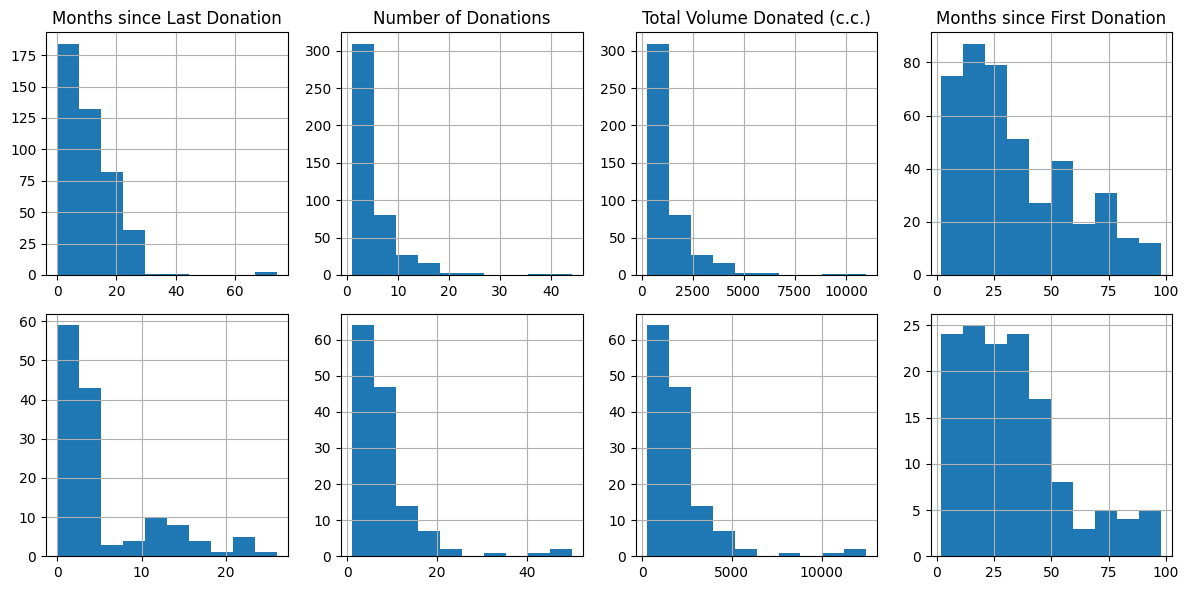

In [39]:
# TODO: Solution below, please remove
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

for i, feat in enumerate(feats):
    row = i // 4
    col = i % 4
    train_df[train_df[label]==0][feat].hist(ax=axes[row, col])
    train_df[train_df[label]==1][feat].hist(ax=axes[row+1, col])
    axes[row, col].set_title(feat)

plt.tight_layout()
plt.show()


## Task 7 - Check for Feature Correlations

Check if any pair of features are correlated using. Since all features are continuous you can use pandas default correction (Pearson Corr) <br/>
Knowing this - what should you do when you build the model?

`Ask ChatGPT! : How do correlated feature impact performance of a Logistic Regression Model`


In [40]:

def calc_corr(df: pd.DataFrame) -> None:
    '''
    Complete the function to calculate all pairwise correlation
    From the output Identify the pair of features that are highly correlated.
    '''
    
    # TODO: Solution below, please remove
    return df.corr()


# Do not change this code
calc_corr(train_df[feats])


,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
Months since Last Donation,1.000000,-0.159731,-0.159731,0.186899
Number of Donations,-0.159731,1.000000,1.000000,0.622116
Total Volume Donated (c.c.),-0.159731,1.000000,1.000000,0.622116
Months since First Donation,0.186899,0.622116,0.622116,1.000000


## Task 8 - Identify Predictive Features

Check which of the feature are predictive (i.e. will a donor donate blood). For this you can used a specific statistical test called 'Welch's t-test' and assuming significance alpha = 0.01

`Ask ChatGPT:  What is welch's t-test, and t-test - how does it help determing important features`

In [41]:
def run_student_ttest(df, col) -> tuple[str, float]:
    '''
    Write a function to return p-values from the Welch's t-test
    for feature passed into the function
    '''

    # TODO: Solution below, please remove
    t_stat, p_val = stats.ttest_ind(df[df[label]==0][col], df[df[label]==1][col], 
                                        equal_var=False)  # Welch's t-test
    
    return (col, p_val)

for feat in feats:
    run_student_ttest(train_df, feat)

## Task 9 - Feature Engineering

Lets see if there are any new featues we can engineering. Think about the feature 'Months since First Donation', and 'Number of Donations'.
Can you figure out a sort of 'rate' feature from these two? Would it helpful in predicting who donate next month?

In [42]:
def create_new_feature(df) -> pd.DataFrame:
    '''
    Complete this function to create the 'rate' feature
    '''

    # TODO: Solution below, remove code 
    df['Avg.Dontation Per Month'] = df['Number of Donations']/(df['Months since First Donation'] - df['Months since Last Donation'] + 1)
    return df


# Do not change this code
proc_df = create_new_feature(train_df.copy())
feats_new = list(proc_df.columns)
feats_new.remove(label)

# lets have a look at the new feature set, is the new feature relevant?
for feat in feats_new:
    run_student_ttest(proc_df, feat)

## Task 10 - Creating feature set
Lets try removing irrelevant features and one of correlated feature

In [43]:
def drop_feature(df: pd.DataFrame, cols: list) -> pd.DataFrame:
    '''
    Create a function to remove the columns passed to this function
    '''

    # TODO: Solution below, please remove
    df = df.drop(columns=cols)

    return df


# Do not change this code
proc_df = drop_feature(train_df.copy(), cols = ['Total Volume Donated (c.c.)', 'Months since First Donation'])
proc_df.columns


Index(['Months since Last Donation', 'Number of Donations',
       'Made Donation in March 2007'],
      dtype='object')

We see that one of the feature is not relevant. Can you think of a way to conver that feature to one that is more likely to predict if a person will donate blood in the upcoming month (i.e. March 2007)? 

Hint: Think about using the feature `Number of Dontations` with the irrelevant feature to create a feature that indicates how many donation the donor makes per month.

## Understanding Classification Metrics

The most common classification metrics are - 
* Accuraccy
* Precision
* Recall
* F1-Score
Let's Ask ChatGPT what there are - <br>




## Task 11 - Identify Metric

Now having analyzed the data (from Task 1), choose the best metrics for your task. <br>
<br>

Assume you got the following information from business - 
* If you prediction someone is going to donate, but they dont - this is huge concern. You want to reduce such `false positives` as much as possible.
* If you predict someone is not going to donate, and they do come - it is ok. The blood donation camp can manage.

Knowing the above - decide which metric to use. <br>
Irrespective of what you use evaluate performance using F1 as well.

In [44]:
def calc_perf(y_act: list, y_pred: list) -> float:
    '''
    Compelete this function to calculate the metric
    you have chosen
    '''

    # TODO: Solution below, pleas remove
    val = precision_score(y_act, y_pred)
    return val

## Training the Model

Now, finally we can start training the model. When training an ML model its important to have three datasets
* Train dataset - which you use to train the model and learn parameter
* Validation dataset - the dataset to use to figure out which parameter are the best
* Test dataset - the hidden dataset, that you DO NOT look at. Its only use to estimate the performance in future unseen datasets.

## Task 12 - Preproces the train data to create traininig and validation data

Lets start by creating these datasets - 
1. Load the train dataset 
2. ONLY run the de-duplication function on train set (lets see what performance we get without outlier removal and feature engineering)
3. Split train dataset 80:20 to creatin a new train dataset and validation set
2. Load the test dataset

In [45]:
def create_dataset(df: pd.DataFrame) -> tuple[np.array, np.array, np. array, np.array]:
    '''
    Remove duplicate data from train file alone (using `remove_duplicates` used earlier)
    Split train file data into train and valid set (keep in mind what we about imbalance learned in Task 5)
        Hint use: train_test_split (set seed to 100), and use the `stratify` field
        Ask ChatGPT: Why is it important to stratify when creating training and validation sets for imbalanced datasets
    
    Return np. arrays for train features, train labels, valid features, valid labels

    '''

    # TODO: Solution below, pleas remove
    df = remove_duplicates(df)

    label = 'Made Donation in March 2007'
    feats = list(df.columns)
    feats.remove(label)

    X = df[feats].values
    y = df[label].values

    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, 
                                                          stratify=y, random_state=100)

    return X_train, y_train, X_valid, y_valid


# Do not change this
X_train, y_train, X_valid, y_valid = create_dataset(pd.read_csv(data_folder + 'training_data.csv'))

## Task 13 - Build Model
Train a basline Logisitc Regression model with default parameters

In [46]:
def train_base(X_train: np.array, y_train: np.array) -> LogisticRegression:
    '''
    Complete this function to
    Train a baseline LogisticRegression Model with default parameter
    Use random_state = 100 to keep results consistent
    '''

    # TODO: Solution below, please remove
    model = LogisticRegression(random_state=100)
    model.fit(X_train, y_train)

    return model


# Do not change this
model = train_base(X_train, y_train)

pred = model.predict(X_train)
print("Train Performance")
print("Selected Metric: ", calc_perf(y_train, pred), "F1-Score: ", f1_score(y_train, pred))

print("\n")

pred = model.predict(X_valid)
print("Validation Performance")
print("Selected Metric: ", calc_perf(y_valid, pred),"F1-Score: ", f1_score(y_valid, pred))

Train Performance
Selected Metric:  0.6382978723404256 F1-Score:  0.425531914893617


Validation Performance
Selected Metric:  0.3333333333333333 F1-Score:  0.2222222222222222


# Improving baseline Model and Analyzing Design Choices

## Task 14 - Fix imbalance to improve performance

Use sampling to balance the number positive and negative samples in the data

In [47]:
def rebalance_df(df: pd.DataFrame) -> pd.DataFrame:
    '''
    Write a function to 
    (a) remove duplicate rows in data
    (b) balance the number of positive and negative samples in train_data
    Hint: Use downsampling, use random_state = 100

    Return balance dataframe
    '''


    # TODO: Solution below, please remove
    df = remove_duplicates(train_df)

    pos_df = df[df[label] == 1]
    neg_df = df[df[label] == 0]

    df = pd.concat([neg_df.sample(frac=0.4, random_state=100), pos_df])
    return df


# Do not change the following code
# load teh data
train_df = pd.read_csv(data_folder + 'training_data.csv')
print(train_df.shape, train_df[label].value_counts(normalize=True))

print("\n\n")

# balance the data
train_df = rebalance_df(train_df)
print(train_df.shape, train_df[label].value_counts(normalize=True))

# check the performance with rebalance dataset
print("\n\n")
X_train, y_train, X_valid, y_valid = create_dataset(train_df)
model = train_base(X_train, y_train)
print(X_train.shape)

pred = model.predict(X_train)
print("Train Performance")
print("Selected Metric: ", calc_perf(y_train, pred), "F1-Score: ", f1_score(y_train, pred))

print("\n")

pred = model.predict(X_valid)
print("Validation Performance")
print("Selected Metric: ", calc_perf(y_valid, pred),"F1-Score: ", f1_score(y_valid, pred))

(576, 5) Made Donation in March 2007
0    0.760417
1    0.239583
Name: proportion, dtype: float64



(240, 5) Made Donation in March 2007
0    0.508333
1    0.491667
Name: proportion, dtype: float64



(192, 4)
Train Performance
Selected Metric:  0.6947368421052632 F1-Score:  0.6984126984126984


Validation Performance
Selected Metric:  0.64 F1-Score:  0.6530612244897959


## Task 15 - Improve model using Class Imbalance

Another way to combat data imbalance is configuring class weights in the Logistic Regression model 

`Ask ChatGPT: Why does one of the methods perform better than the other`
Hint: It could be related to the how the feature distribution for both class overlap as seen in Task 6

In [48]:
def train_tune_model(X_train: np.array, y_train: np.array):
    '''
    Write the function to train a Logistic Regression model
    and use `class_weight` parameter
    Use random_state = 100 to keep results consistent
    '''

    # TODO: Solution below, please remove code
    model = LogisticRegression(class_weight={0:0.25, 1:0.75 }, random_state=100)
    model.fit(X_train, y_train)

    return model


# do no change the following code
train_df = pd.read_csv(data_folder + 'training_data.csv')
X_train, y_train, X_valid, y_valid = create_dataset(train_df)

model = train_tune_model(X_train, y_train)

pred = model.predict(X_train)
print("Train Performance")
print("Selected Metric: ", calc_perf(y_train, pred), "F1-Score: ", f1_score(y_train, pred))

print("\n")

pred = model.predict(X_valid)
print("Validation Performance")
print("Selected Metric: ", calc_perf(y_valid, pred),"F1-Score: ", f1_score(y_valid, pred))

Train Performance
Selected Metric:  0.4375 F1-Score:  0.5511811023622047


Validation Performance
Selected Metric:  0.32558139534883723 F1-Score:  0.417910447761194


## Task 16 - Focus on important features

Lets try 
* dropping the irrelaevant and one of the correlated feature
* Adding the new features <br>

How do all this influence performance - which feature set do you finally keep?

In [49]:
# Do not chage this code
train_df = pd.read_csv(data_folder + 'training_data.csv')
train_df = rebalance_df(train_df)

# ADD YOUR CODE HERE
# Hint: use `create_nea_feature` and `drop_feature` functions mentioned before
# TODO: Solution below, remove it
train_df = create_new_feature(train_df)
train_df = drop_feature(train_df, cols = ['Total Volume Donated (c.c.)'])


# Do not change this code
X_train, y_train, X_valid, y_valid = create_dataset(train_df)
model = train_base(X_train, y_train)

pred = model.predict(X_train)
print("Train Performance")
print("Selected Metric: ", calc_perf(y_train, pred), "F1-Score: ", f1_score(y_train, pred))

print("\n")

pred = model.predict(X_valid)
print("Validation Performance")
print("Selected Metric: ", calc_perf(y_valid, pred),"F1-Score: ", f1_score(y_valid, pred))

Train Performance
Selected Metric:  0.7052631578947368 F1-Score:  0.708994708994709


Validation Performance
Selected Metric:  0.64 F1-Score:  0.6530612244897959



Did the performance drop? If so, why? <br>
When you add which feature back in is the performance coming back up? <br>

Does it make sense that adding a feature that failed student t-test helped improve performance of Logistic Regression? <br>

`Ask ChatGPT why this could happen (Hint it could be related to how features work together)`

## Task 17 - Normalizing Features

Normalize features to see how it impact perforamance for the Log.Reg model from the task

In [50]:


def train_tune_model(X_train: np.array, y_train: np.array, 
                     scaler):
    '''
    Complete this function to normalize features 
    X_train: is the train features values
    y_train: is train labels
    scaler: The scaler you have chosen

    Bonus [Optional] Task : 
    Fine-tune the Logistic Regression Model.
    Some of the parameters you may want to experiment with are - solver, penatly and C
    '''

    # Hint: Use StandardScaler to normalize features
    # Ask ChatGPT what type of feature scaling is best for Logistic Regression and why

    # TODO: Solution below, remove this code
    X_train = scaler.fit_transform(X_train)

    model = LogisticRegression()
    model.fit(X_train, y_train)

    return (model, scaler)

scaler = StandardScaler()


# Do not change this code
train_df = pd.read_csv(data_folder + "training_data.csv")
train_df = rebalance_df(train_df)
train_df = drop_feature(train_df, cols = ['Total Volume Donated (c.c.)'])

X_train, y_train, X_valid, y_valid = create_dataset(train_df)
model, scaler = train_tune_model(X_train, y_train, scaler)

X_valid = scaler.transform(X_valid) # we use the same scaler you have used earlier
pred = model.predict(X_valid)
print("Validation Performance")
print("Selected Metric: ", calc_perf(y_valid, pred),"F1-Score: ", f1_score(y_valid, pred))

Validation Performance
Selected Metric:  0.6666666666666666 F1-Score:  0.6666666666666666


## Task 18 - Model Interpretability

Extract the coefficient from the model by completing this function

`Ask ChatGPT: How do you interpret coeffcient of a Logistic Regression model`

In [51]:
def get_model_coeff(model : LogisticRegression, feats: list):
    '''
    Complete this function to print pair of values
    (feature name, coeff value)
    '''

    # TODO: Remove this code
    coeffs = list(model.coef_)[0]
    print(coeffs)

    for i in range(len(feats)):
        print(feats[i], coeffs[i])
    
    print("Intercept", model.intercept_)


get_model_coeff(model, list(train_df.columns)[:-1])

[-0.58941852  0.71388235 -0.83363638]
Months since Last Donation -0.5894185240670456
Number of Donations 0.7138823467498129
Months since First Donation -0.8336363848567876
Intercept [-0.08503673]


## Task 19 - Creation of Model
Finally apply all the transformation you deem best and get prediction on test datasets

In [52]:
test_data = pd.read_csv(data_folder + 'test_data.csv')
test_data.head()
print(test_data.columns)
print(feats)

def get_test_prediction(test_df: pd.DataFrame) -> list:
    '''
    Apply all the data transformation you deem necessary
    Note: 
    Missing value must be replaced by mean value from train set NOT test set

    Fit model on train data and get prediction on test set
    '''

    feats = ['Months since Last Donation', 'Number of Donations', 'Months since First Donation']
    X_test = test_df[feats]
    X_test = scaler.transform(X_test)
    val = list(model.predict(X_test))

    return val

get_test_prediction(test_data)

Index(['Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation'],
      dtype='object')
['Months since Last Donation', 'Number of Donations', 'Total Volume Donated (c.c.)', 'Months since First Donation']


/opt/anaconda3/envs/ads/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


[1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0]